# Good practice when loading and visualizing images 

*And how to avoid some common pitfalls*

We will use `skimage` for loading the image, but similar consideration should be done if other loaders were used.
For visualization we use `matplotlib` which is by far the most popular library for visualization in Python.

In [3]:
import skimage
import matplotlib.pyplot as plt

Imagine wanting to work with part of a sample image from `skimage`.  The first to do is to visualize this image. The default visualization from `matplotlib` will show the image using false colors (since default colormap is `viridis`). Since this is a grayscale image, it is probably better to show it in using colormap `gray`. Even better, make a conscious choice about range of values covered by colormap. Good idea is to get yourself familiar with the input parameters of [matplotlib imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html). Below you see the different visualization options.

Original gravel image: 

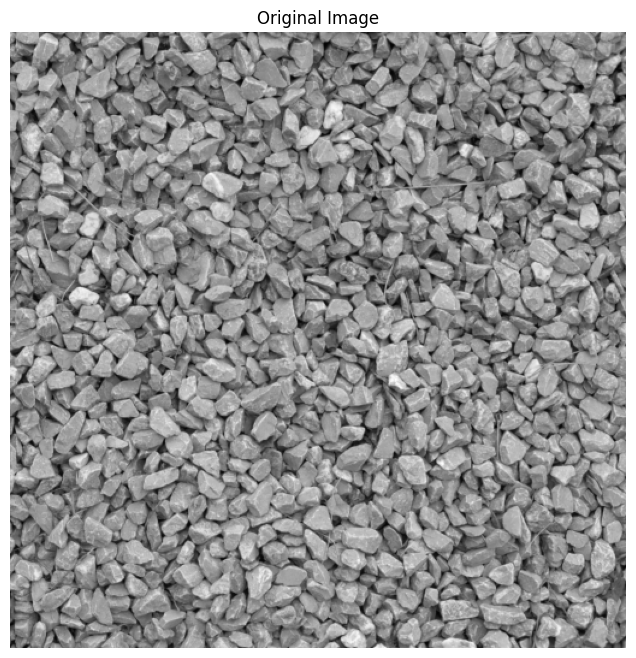

In [24]:
image_full = skimage.data.gravel()
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(image_full, cmap='gray')
ax.axis('off')
plt.title('Original Image')
plt.show()

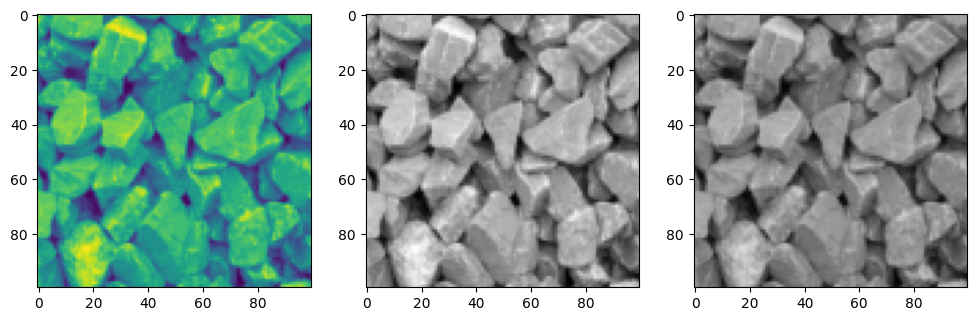

In [25]:
# we slice the image to get a smaller image 
# we get the first 100 rows and the first 100 columns
image = skimage.data.gravel()[:100,:100]
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(image)
ax[1].imshow(image, cmap='gray')
ax[2].imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()

In [22]:
# inspect the image shape 
print(f"The shape of the image is {image.shape}")
print(f"Type of the image is {image.dtype}")
print(f"Min value of the image is {image.min()}")
print(f"Max value of the image is {image.max()}")



The shape of the image is (100, 100)
Type of the image is uint8
Min value of the image is 6
Max value of the image is 218


Imagine now wanting to compute image gradient by finite differences. An easy solution is to subtract two slightly shifted images. Doing this without considering data type results in an image shown below.

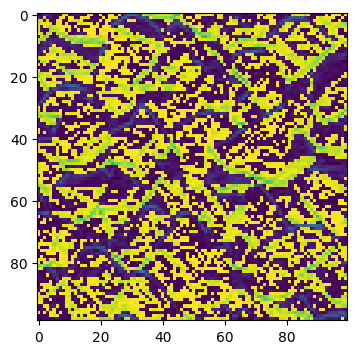

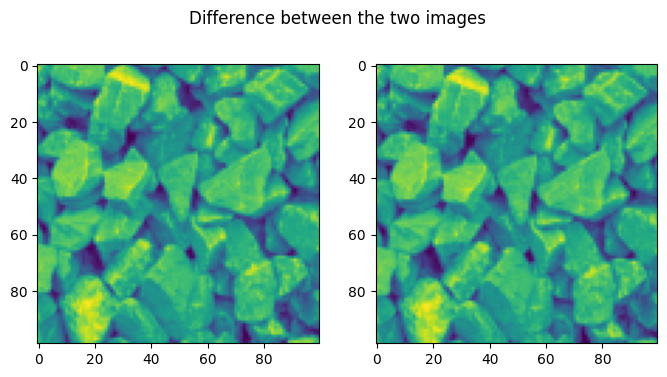

In [27]:
image = skimage.data.gravel()[:100,:100]
diff_x = image[1:] - image[:-1]

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(diff_x)
plt.show()

diff_x_1 = image[1:]
diff_x_2 = image[:-1]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(diff_x_1)
ax[1].imshow(diff_x_2)
plt.suptitle('Difference between the two images')
plt.show()

What we see is a consequence of an image being represented using unsigned integers. So when subtracting a larger number from the smaller, the result cannot be negative. For example, in the cell below you can see first elements in the top two rows, and the result of subtracting the two rows. 

In [110]:
print(image[:2, :12])
print(diff_x[:1, :12])

[[171 159 128 104  92 133 157 162 170 163 158 156]
 [171 161 158 134 112 138 163 165 159 156 164 171]]
[[  0   2  30  30  20   5   6   3 245 249   6  15]]


To correctly compute the difference the data type has been changed to integer. Furthermore, in the last subplot we use `bwr` (blue-white-red) colormap and we set the range of values centered around 0 which corresponds to white color. This makes it easy to see the negative (blue) and positive (red) values.  

Shape of the original iamge is (100, 100)
Shape of the difference image is (99, 100)


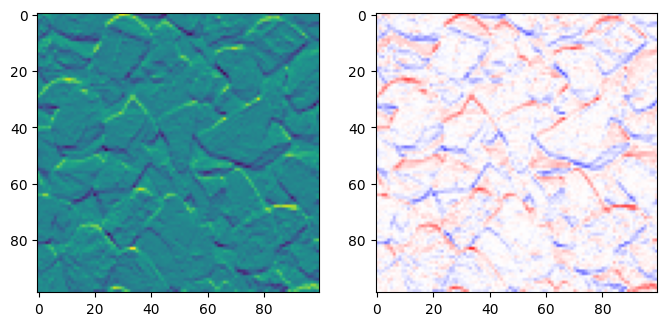

In [31]:
image = skimage.data.gravel()[:100,:100]
image = image.astype(int)
# [1:,:] means we take all the rows except the first one
# so the shape of the difference image will be 1 less than the original image

# [:-1,:] means we take all the rows except the last one
# so the shape of the difference image will be 1 less than the original image

# the difference image will have the same number of columns as the original image
# but the rows will be 1 less than the original image
# the result is the vertical gradient (row-wise gradients in the image)
diff_x = image[1:,:] - image[:-1,:] 


print(f"Shape of the original iamge is {image.shape}")
print(f"Shape of the difference image is {diff_x.shape}")

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(diff_x)
ax[1].imshow(diff_x, cmap='bwr', vmin=-128, vmax=128)
plt.show()

Imagine now that you want to compute and visualize the difference between the image and its smoothed version. You cast the image to type integer, and you use filtering from `skimage`. You might end with the result as below.

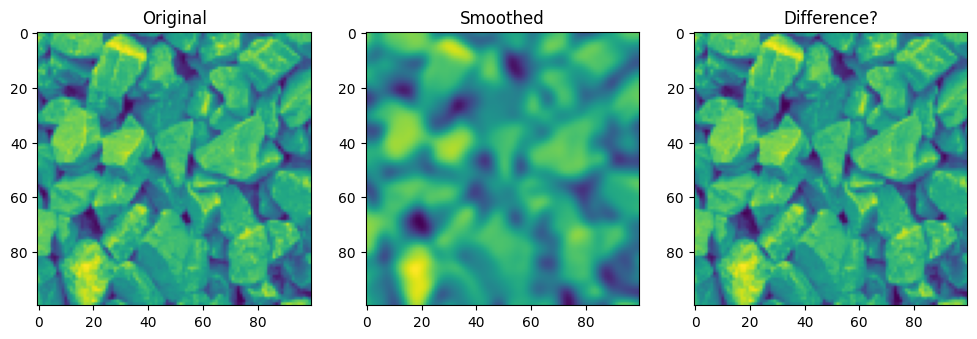

In [32]:
image = skimage.data.gravel()[:100,:100].astype(int)
imsmooth = skimage.filters.gaussian(image, sigma=2) 
imdiff = image - imsmooth

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(image)
ax[0].set_title('Original')
ax[1].imshow(imsmooth)
ax[1].set_title('Smoothed')
ax[2].imshow(imdiff)
ax[2].set_title('Difference?')
plt.show()

The difference is almost identical to original image because `skimage` converted the image to type. You can confirm that by checking the value ranges as below, and the explanation is found in the documentation of [skimage gaussian filter](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian).

In [33]:
print(f'{image.min()=}, {image.max()=}')
print(f'{imsmooth.min()=}, {imsmooth.max()=}')

image.min()=np.int64(6), image.max()=np.int64(218)
imsmooth.min()=np.float64(3.958799265524168e-18), imsmooth.max()=np.float64(2.1505635277924467e-17)


Below, we can convert the original image to float before smoothing such that subtracting the smoothed from original image makes sense. The difference is shown using a suitable colormap.

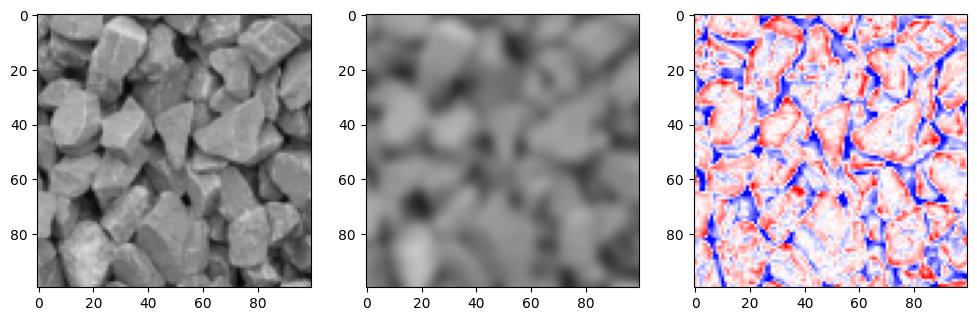

In [34]:
image = skimage.data.gravel()[:100,:100]
image = image.astype(float)/255
imsmooth = skimage.filters.gaussian(image, sigma=2)
imdiff = image - imsmooth

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(image, cmap='gray', vmin=0, vmax=1)
ax[1].imshow(imsmooth, cmap='gray', vmin=0, vmax=1)
ax[2].imshow(imdiff, cmap='bwr', vmin=-0.2, vmax=0.2)
plt.show()

Finally, when needing to visualize two images in the same frame, consider using transparency. In the first example below we use `alpha` parameter of `imshow` function. In the second example we make a RGBA image by passing values to colormapping function, and then we adjust the alpha channel of this image. 

Shape of the rgba image is (100, 100, 4)


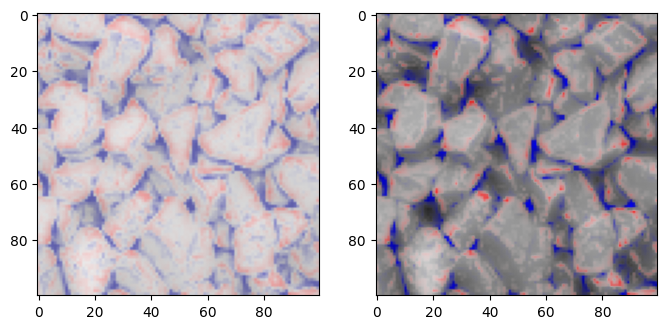

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(image, cmap='gray', vmin=-1, vmax=1)
ax[0].imshow(imdiff, cmap='bwr', vmin=-0.2, vmax=0.2, alpha=0.3) # Overlays the imdiff image on top of the grayscale image.
# vmin=-0.2 and vmax=0.2 map the range of values in imdiff to the color spectrum.
# alpha=0.3 adds transparency to the overlay so both the base image and the difference visualization are visible.

# First, make rgba image as it using cmap='bwr', vmin=-0.2, vmax=0.2
cutoff = 0.2

# The normalization formula: 
# imdiff + 0.2: Shifts the range of imdiff so values center around 0.
# / cutoff: Scales the difference values to lie between 0 and 1.
# clip(0, 1): Clamps the values to lie between 0 and 1.
rgba = plt.cm.bwr((0.5 * (imdiff + 0.2) / cutoff).clip(0, 1)) 
print(f"Shape of the rgba image is {rgba.shape}")

# Now, adjust the alpha channel to make it transparent where abs(imdiff) is small
rgba[:,:,3] = abs(imdiff) # Sets the alpha channel (transparency) of the RGBA image based on the absolute magnitude of the imdiff values. Areas with smaller differences will be more transparent.
rgba[:,:,3] = rgba[:,:,3]/rgba[:,:,3].max() # Normalizes the alpha values so that the maximum transparency corresponds to the maximum absolute difference. This ensures consistent transparency scaling.

ax[1].imshow(image, cmap='gray', vmin=0, vmax=1)   
ax[1].imshow(rgba)

plt.show()


This above script uses Matplotlib to create a visualization overlay of the original image and the difference image (imdiff) using transparency to highlight areas where the differences are significant.

